# Statistical Analysis II - Practicum 1

## Non-parametric statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

### Mann-Whitney U-test (Wilcoxon rank sum test)

Example from [the web](http://users.sussex.ac.uk/~grahamh/RM1web/Mann-Whitney%20worked%20example.pdf)

The effectiveness of advertising for two rival products (Brand X and Brand Y) was compared.
Market research at a local shopping centre was carried out, with the participants being shown adverts for two rival brands of tea, which they then rated on the overall likelihood of them buying the product (out of 10, with 10 being "definitely going to buy the product").
Half of the participants gave ratings for one of the products, the other half gave ratings for the other product.

In [40]:
df = pd.DataFrame({'Participant':np.arange(6),
                   'Rating': [3,4,2,6,2,5]})
df = df.set_index('Participant')

df2 = pd.DataFrame({'Participant':np.arange(6),
                   'Rating': [9,7,5,10,6,8]})

df2 = df2.set_index('Participant')

print(df)

print(df2)

             Rating
Participant        
0                 3
1                 4
2                 2
3                 6
4                 2
5                 5
             Rating
Participant        
0                 9
1                 7
2                 5
3                10
4                 6
5                 8


Which test do we use? We have two conditions, with each participant taking part in only one of the conditions.  The data are ratings (ordinal data), and hence a nonparametric test is appropriate -  the Mann-Whitney U test. 

Rank all scores together, ignoring which group they belong to. 

In [41]:
df['Product'] = 1
df2['Product'] = 2

df_compare = pd.concat([df,df2])

df_compare['Rank'] = df_compare.Rating.rank()

df_compare

,Rating,Product,Rank
Participant,,,
0,3,1,3.0
1,4,1,4.0
2,2,1,1.5
3,6,1,7.5
4,2,1,1.5
5,5,1,5.5
0,9,2,11.0
1,7,2,9.0
2,5,2,5.5


Add up the ranks for Brand 1, to get T1; and the same for 2, to get T2

In [42]:
T1 = df_compare.groupby('Product').get_group(1)['Rank'].sum()

print(T1)

T2 = df_compare.groupby('Product').get_group(2)['Rank'].sum()

print(T2)

23.0
55.0


Select the larger rank.  In this case it’s T2.  

Calculate **n1, n2** and **nx**

These are the number of participants in each group, and the number of people in the group that gave the larger rank total.  

Therefore

In [43]:
n1 = 6         
n2 = 6         
nx = 6 #because the largest rank is T2

Find U (Note: Tx is the larger rank total, T2 in this case)  

$U = n_1 n_2 + n_x \frac{n_x+1}{2}-T_x$

In [44]:
U = n1*n2+nx*(nx+1)/2-T2

U

2.0

Use a table of critical U values for the Mann-Whitney U Test

![title](images/significance_table_MW5.png)

![title](images/significance_table_MW1.png)

For **n1 = 6** and **n2=6**, *the critical value of U is 5* for a two-tailed test at the **0.05 significance level**, and *2* **at the 0.01 significance level**. 

To be significant, our obtained U has to be equal to or less than this critical value. 

Our obtained U = 2, which implies that we can say that there is a highly significant difference (**p<.01**) between the ratings given to each brand in terms of the likelihood of buying the product.

How would it have been with python scipy? Can see the details of the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [45]:
mannwhitneyu(x=df.Rating,
             y=df2.Rating,
             alternative='two-sided')

MannwhitneyuResult(statistic=2.0, pvalue=0.012591911490379705)

#### Part 2

Now try one example for yourself from this [database](https://reneshbedre.github.io/assets/posts/mann_whitney/genotype.csv) on hypothetical plant genotypes (A and B) yield.

**Is the difference between the two significant?**

In [46]:
df_csv=pd.read_csv("https://reneshbedre.github.io/assets/posts/mann_whitney/genotype.csv")
df_csv

,A,B
0,60,29
1,30,25
2,60,25
3,60,30
4,30,25
5,45,25
6,45,20
7,56,30
8,56,10
9,56,10


Get summary statistics

In [47]:
df_csv.agg(["count", "min", "max", "median", "mean", "skew"])

,A,B
count,23.000000,23.000000
min,20.000000,10.000000
max,60.000000,32.000000
median,56.000000,28.000000
mean,47.695652,25.217391
skew,-0.710884,-1.270302


Generate boxplot to visualise the data spread

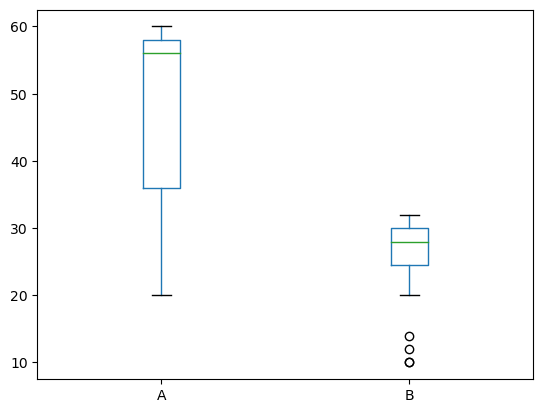

In [48]:
df_csv.boxplot(column=['A', 'B'], grid=False)
plt.show()

Let's check the distribution shape (although a hint is already given in the boxplot)

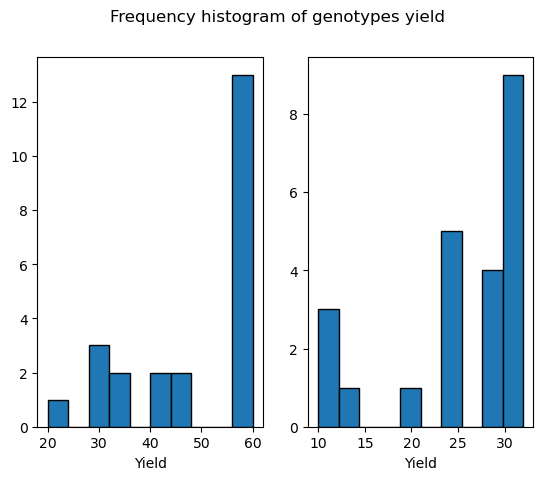

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of genotypes yield')
ax1.hist(df_csv['A'], bins=10, histtype='bar', ec='k') 
ax2.hist(df_csv['B'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Yield")
ax2.set_xlabel("Yield")
plt.show()

Perform two-sided test

In [50]:
mannwhitneyu(x=df_csv['A'], y=df_csv['B'], alternative = 'two-sided')

MannwhitneyuResult(statistic=489.5, pvalue=7.004695394561307e-07)

We can repeat the test one-sided to check if one of the two genotypes has a higher yield than the other

In [51]:
mannwhitneyu(x=df_csv['A'], y=df_csv['B'], alternative = 'greater')

MannwhitneyuResult(statistic=489.5, pvalue=3.5023476972806534e-07)

In [52]:
mannwhitneyu(x=df_csv['A'], y=df_csv['B'], alternative = 'less')

MannwhitneyuResult(statistic=489.5, pvalue=0.999999687507846)